# Indian Election Analysis

India's lower house of Parliament,the Lok Sabha, has 543 seats in total.Members of Lok Sabha (House of the People) or the lower house of India's Parliament are elected by being voted upon by all adult citizens of India, from a set of candidates who stand in their respective constituencies. Every adult citizen of India can vote only in their constituency. Candidates who win the Lok Sabha elections are called 'Member of Parliament' and hold their seats for five years or until the body is dissolved by the President on the advice of the council of ministers.

There are more than 700 million voters with more than 800,000 polling stations.

The Lok Sabha election is a very complex affair as it involves a lot of factors. It is this very fact that makes it a perfect topic to analyze.

Currently there are two major parties in India, Bhartiya Janta Party(BJP) and Indian National Congress(INC).

As India is country of diversities, and each region is very different from every other region, there are a lot of regional or state parties having major influences. These parties can either support any of the alliance to make a government or can stay independent.

There are two major alliances, the NDA led by BJP and the UPA led by INC.

## About the data set

### There are two datasets:

#### 1. 2009 Candidate dataset:

The candidate dataset has 15 features namely  'ST_CODE', 'State_name', 'Month', 'Year', 'PC_Number', 'PC_name', 'PC_Type', 'Candidate_Name', 'Candidate_Sex', 'Candidate_Category', 'Candidate_Age', 'Party_Abbreviation', 'Total_Votes_Polled', 'Position','Alliance'.

#### 2. 2009 Electors dataset

The elector dataset consist of 8 features namely 'STATE CODE', 'STATE', 'PC NO', 'PARLIAMENTARY CONSTITUENCY','Total voters', 'Total_Electors', 'TOT_CONTESTANT', 'POLL PERCENTAGE'.

## Loading necessary Libraries and dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

electors_2009 = pd.read_csv("/content/sample_data/LS2009Electors.csv")
candidate_2009 = pd.read_csv("/content/sample_data/candidate09.csv")
electors_2009.head()

,STATE CODE,STATE,PC NO,PARLIAMENTARY CONSTITUENCY,Total voters,Total_Electors,TOT_CONTESTANT,POLL PERCENTAGE
0,S01,Andhra Pradesh,1,Adilabad,864165,1131211,9,76.39
1,S01,Andhra Pradesh,2,Peddapalle,905332,1315642,15,68.81
2,S01,Andhra Pradesh,3,Karimnagar,990646,1496211,15,66.21
3,S01,Andhra Pradesh,4,Nizamabad,891508,1333271,12,66.87
4,S01,Andhra Pradesh,5,Zahirabad,1017372,1359566,10,74.83


In [0]:
candidate_2009.head()

,ST_CODE,State_name,Month,Year,PC_Number,PC_name,PC_Type,Candidate_Name,Candidate_Sex,Candidate_Category,Candidate_Age,Party_Abbreviation,Total_Votes_Polled,Position,Alliance
0,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD RAMESH,M,ST,43.0,TDP,372268.0,1.0,TDP
1,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,KOTNAK RAMESH,M,ST,39.0,INC,257181.0,2.0,UPA
2,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,MESRAM NAGO RAO,M,ST,59.0,PRAP,112930.0,3.0,PRAP
3,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,ADE TUKARAM,M,ST,55.0,BJP,57931.0,4.0,NDA
4,S01,Andhra Pradesh,3,2009,1,Adilabad,ST,RATHOD SADASHIV NAIK,M,ST,50.0,BSP,16471.0,5.0,BSP


## Task 1 : Plot a bar chart to compare the number of male and female candidates in the election

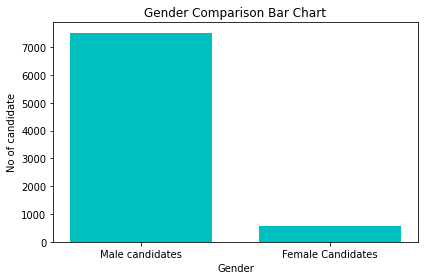

In [0]:
gender = candidate_2009['Candidate_Sex'].value_counts()
count = [gender[0], gender[1]]
x = ['Male candidates','Female Candidates']

plt.bar(x, count, color='c', width=0.75)
plt.xlabel('Gender')
plt.ylabel('No of candidate')
plt.title('Gender Comparison Bar Chart')

plt.tight_layout()
plt.show()

## Task 2 : Plot a histogram of the age of all the candidates as well as of the winner amongst them. Compare them and note an observation

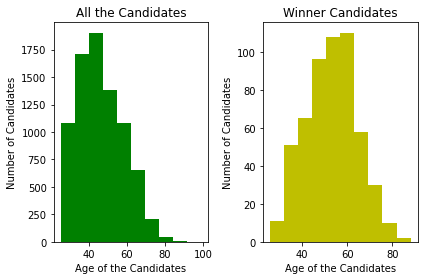

In [0]:
winner = candidate_2009[candidate_2009['Position'] == 1.0]

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, tight_layout=True)
ax1.hist(list(candidate_2009['Candidate_Age']), bins=10, color='g')
ax1.set_xlabel('Age of the Candidates')
ax1.set_ylabel('Number of Candidates')
ax1.set_title('All the Candidates')

ax2.hist(list(winner['Candidate_Age']), bins=10, color='y')
ax2.set_xlabel('Age of the Candidates')
ax2.set_ylabel('Number of Candidates')
ax2.set_title('Winner Candidates')

plt.show()

## Task 3 : Plot a bar graph to get the vote shares of different parties

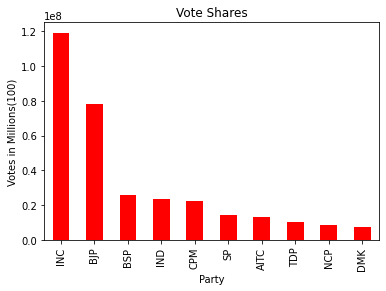

In [0]:
vote_share = candidate_2009.groupby(['Party_Abbreviation'])['Total_Votes_Polled'].sum()

party_vote_share = vote_share.sort_values(ascending = False)[:10].plot(kind='bar', color='r')
party_vote_share.set_xlabel('Party')
party_vote_share.set_ylabel('Votes in Millions(100)')
party_vote_share.set_title('Vote Shares')

plt.show()

## Task 4 : Plot a barplot to compare the mean poll percentage of all the states

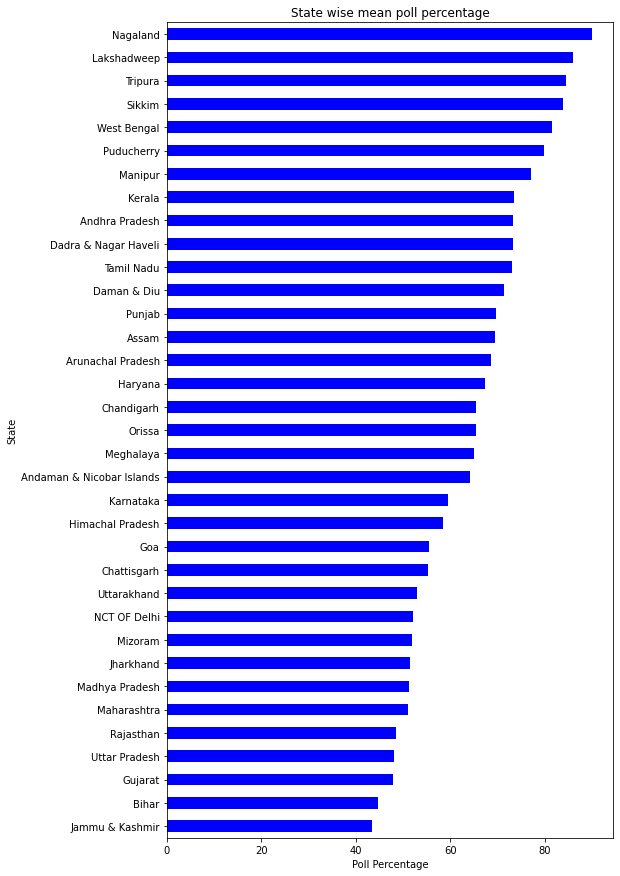

In [0]:
Mean_Poll = electors_2009.groupby(['STATE'])['POLL PERCENTAGE'].mean().sort_values(ascending=True)
Mean_Poll.plot(kind='barh', color='b', figsize=(8, 15))
plt.xlabel('Poll Percentage')
plt.ylabel('State')
plt.title('State wise mean poll percentage')

plt.show()

## Task 5 : Plot a bar plot to compare the seats won by different parties in Uttar Pradesh

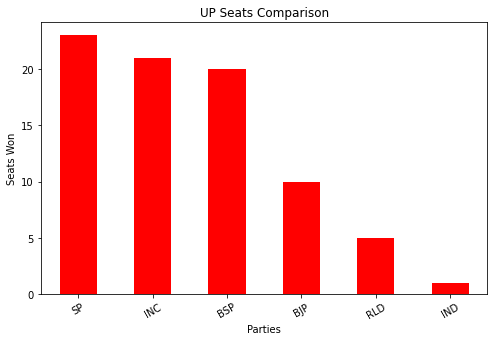

In [0]:
UP_Seats = candidate_2009[(candidate_2009['State_name'] == 'Uttar Pradesh') & (candidate_2009['Position'] == 1.0)]

UP_Seats['Party_Abbreviation'].value_counts(ascending=False).plot(kind='bar', color='r', figsize=(8,5))
plt.xlabel('Parties')
plt.ylabel('Seats Won')
plt.title('UP Seats Comparison')
plt.xticks(rotation=30)

plt.show()

## Task 6 : Plot a stacked bar chart to compare the number of seats won by different `Alliances` in Gujarat,Madhya Pradesh and Maharashtra. 

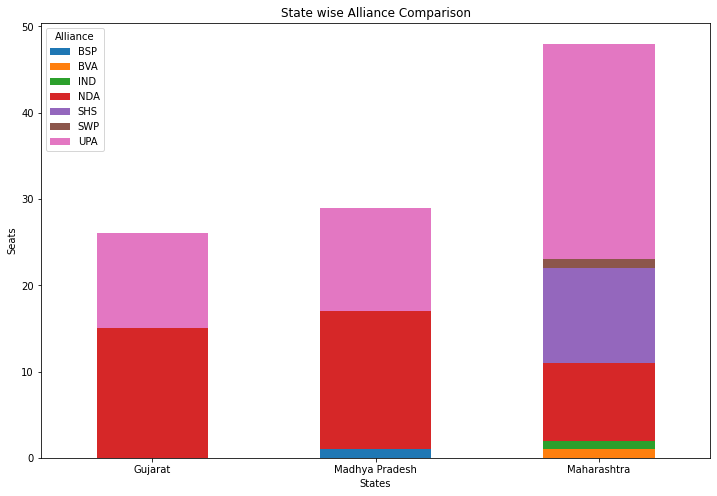

In [0]:
Alliance_Seats = candidate_2009[((candidate_2009['State_name'] == 'Gujarat') | (candidate_2009['State_name'] == 'Madhya Pradesh') | (candidate_2009['State_name'] == 'Maharashtra')) & (candidate_2009['Position'] == 1.0)]

Alliance_Seats.groupby(['State_name', 'Alliance']).size().unstack().plot(kind='bar', stacked=True, figsize=(12,8))
plt.xlabel('States')
plt.ylabel('Seats')
plt.title('State wise Alliance Comparison')
plt.xticks(rotation=360)
plt.show()

## Task 7 : Plot a grouped bar chart to compare the number of winner candidates on the basis of their caste in the states of Andhra Pradesh, Kerala, Tamil Nadu and Karnataka

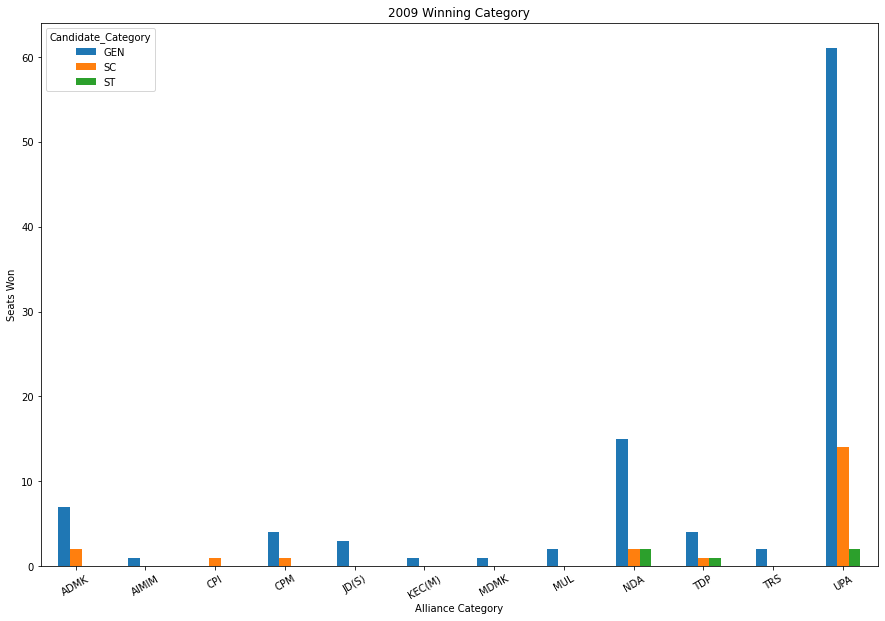

In [0]:
states = candidate_2009[((candidate_2009['State_name'] == 'Andhra Pradesh') | (candidate_2009['State_name'] == 'Kerala') | (candidate_2009['State_name'] == 'Tamil Nadu') | (candidate_2009['State_name'] == 'Karnataka')) & (candidate_2009['Position'] == 1.0)]
Alliance = states.groupby(['Alliance', 'Candidate_Category'])['Position'].size().unstack().fillna(0).plot(kind='bar', stacked=False, title='2009 Winning Category', figsize=(15,10))

plt.xlabel('Alliance Category')
plt.ylabel('Seats Won')
plt.xticks(rotation=30)
plt.show()

## Task 8 : Plot a horizontal bar graph of the Parliamentary constituency with total voters less than 100000

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000.]), <a list of 7 Text major ticklabel objects>)

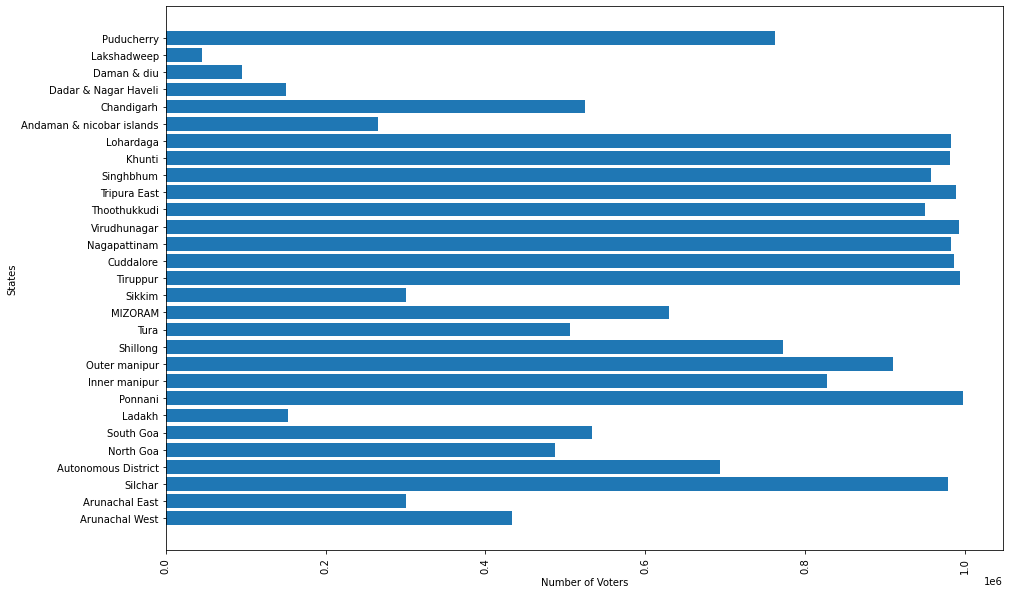

In [0]:
# Constituency with less than 100000 voters
voters = electors_2009[electors_2009.Total_Electors < 1000000]

# Plot a horizontal bar graph to compare constituencies with less than 1000000 voters
plt.figure(figsize=(15,10))

plt.barh(voters['PARLIAMENTARY CONSTITUENCY'] , voters['Total_Electors'])

plt.xlabel('Number of Voters')
plt.ylabel('States')
plt.xticks(rotation = 90)

## Task 9: Plot a pie chart with the top 10 parties with majority seats in the elections

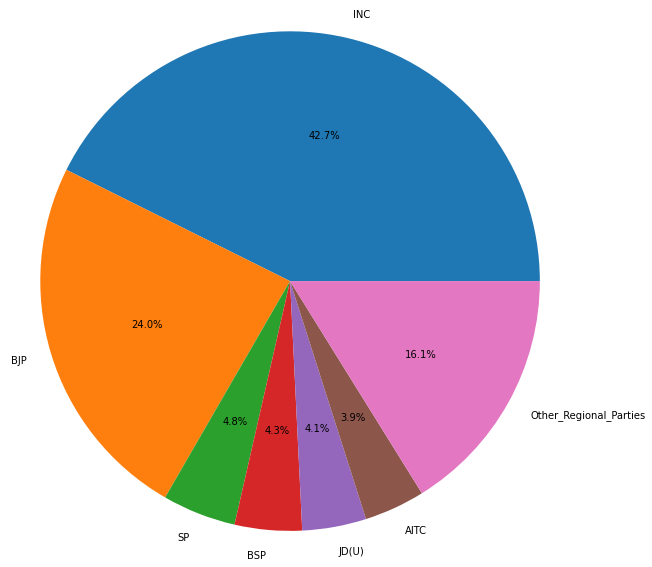

Object `pct` not found.


In [0]:
winners = candidate_2009[candidate_2009['Position'] == 1]
Final = winners['Party_Abbreviation'].value_counts()[:6].to_dict()

Final['Other_Regional_Parties'] = sum(winners['Party_Abbreviation'].value_counts()) - sum(winners['Party_Abbreviation'].value_counts()[:10])

plt.figure(figsize=(10,10))
plt.pie(Final.values(), labels=Final.keys(), autopct='%1.1f%%')
plt.axis('equal')
plt.show()


## Task 10 : Plot a pie diagram for top 9 states with most number of seats

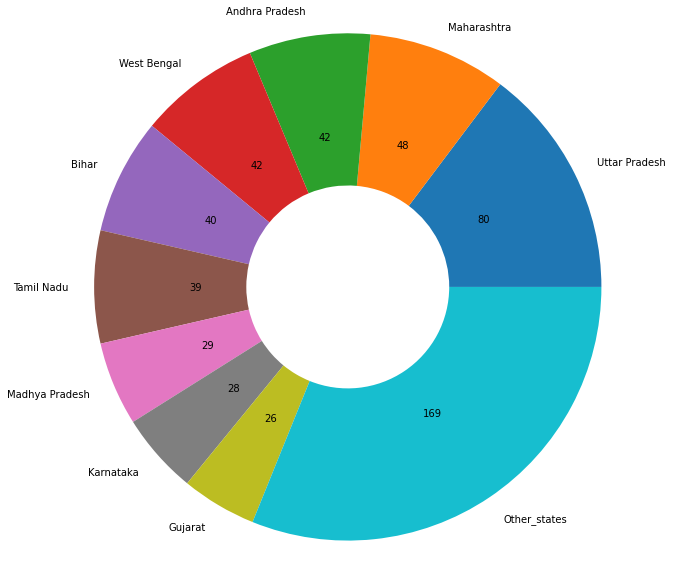

In [0]:
states = electors_2009['STATE'].value_counts()[:9].to_dict()

states['Other_states'] = sum(electors_2009['STATE'].value_counts()) - sum(electors_2009['STATE'].value_counts()[:9])

# Function to convert percentages into actual values
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

values = autopct_format(states.values())

plt.figure(figsize=(10, 10))
plt.pie(states.values(), labels=states.keys(), autopct=values, wedgeprops=dict(width=0.6))

plt.axis('equal')
plt.show()